Join the data from Part 1 with the data from Part 2 to create a new dataframe.

In [6]:

import pandas as pd

df_stations = pd.read_csv("bike_stations.csv")
df_yelp = pd.read_csv("yelp_pois.csv")
df_fsq = pd.read_csv("fsq_pois.csv")





In [8]:
yelp_summary = df_yelp.groupby("station").agg({
    "station_lat": "first",
    "station_lon": "first",
    "business_name": "count",
    "rating": "mean",
    "review_count": "sum",
    "distance_m": "min"
}).rename(columns={
    "rating": "avg_yelp_rating",
    "review_count": "total_yelp_reviews",
    "distance_m": "closest_yelp_distance",
    "business_name": "total_yelp_venues"
}).reset_index()

yelp_summary.head()

,station,station_lat,station_lon,total_yelp_venues,avg_yelp_rating,total_yelp_reviews,closest_yelp_distance
0,12e avenue / St-Zotique,45.556867,-73.589306,10,4.44,4118,398.273015
1,14e avenue / Jean-Talon,45.561324,-73.596294,10,4.46,4129,1374.100685
2,15e Rue / Robin,45.559377,-73.698510,10,4.39,727,1826.814001
3,15e avenue / Dandurand,45.554787,-73.574259,10,4.49,4564,580.325179
4,15e avenue / Laurier,45.553320,-73.569328,10,4.37,4812,1655.352221


In [9]:
fsq_summary = df_fsq.groupby("station").agg({
    "station_lat": "first",
    "station_lon": "first",
    "place_name": "count",
    "distance": "min"
}).rename(columns={
    "place_name": "total_fsq_venues"
}).reset_index()

fsq_summary.head()

,station,station_lat,station_lon,total_fsq_venues,distance
0,12e avenue / St-Zotique,45.556867,-73.589306,10,248
1,14e avenue / Jean-Talon,45.561324,-73.596294,10,79
2,15e Rue / Robin,45.559377,-73.698510,10,161
3,15e avenue / Dandurand,45.554787,-73.574259,10,306
4,15e avenue / Laurier,45.553320,-73.569328,10,257


Provide a visualization that you used as part of your EDA process. Explain the initial pattern or relationship you discoved through this visualization. 

In [10]:
merged = fsq_summary.merge(yelp_summary, on="station", suffixes=('_fsq', '_yelp'))

merged

,station,station_lat_fsq,station_lon_fsq,total_fsq_venues,distance,station_lat_yelp,station_lon_yelp,total_yelp_venues,avg_yelp_rating,total_yelp_reviews,closest_yelp_distance
0,12e avenue / St-Zotique,45.556867,-73.589306,10,248,45.556867,-73.589306,10,4.44,4118,398.273015
1,14e avenue / Jean-Talon,45.561324,-73.596294,10,79,45.561324,-73.596294,10,4.46,4129,1374.100685
2,15e Rue / Robin,45.559377,-73.698510,10,161,45.559377,-73.698510,10,4.39,727,1826.814001
3,15e avenue / Dandurand,45.554787,-73.574259,10,306,45.554787,-73.574259,10,4.49,4564,580.325179
4,15e avenue / Laurier,45.553320,-73.569328,10,257,45.553320,-73.569328,10,4.37,4812,1655.352221
...,...,...,...,...,...,...,...,...,...,...,...
956,Édouard-Montpetit / de Stirling,45.507379,-73.614860,10,400,45.507379,-73.614860,10,4.50,2724,1533.639353
957,Émery / St-Denis,45.514832,-73.563493,10,170,45.514832,-73.563493,10,4.32,6825,840.751288
958,Émile-Duployé / Rachel,45.529707,-73.569981,10,481,45.529707,-73.569981,10,4.31,7098,611.062827
959,Émile-Duployé / Sherbrooke,45.527195,-73.564526,10,416,45.527195,-73.564526,10,4.43,7136,509.918850


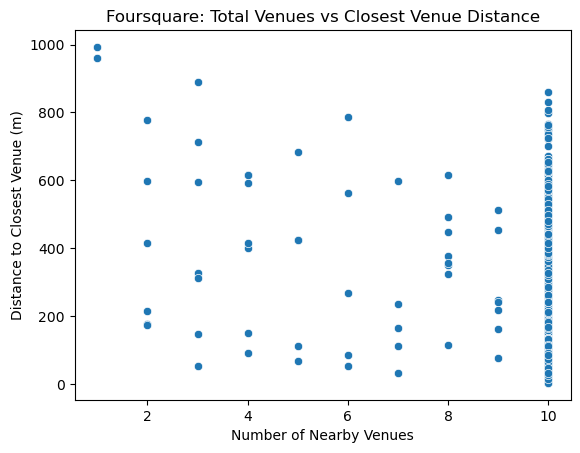

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(
    data=fsq_summary,
    x="total_fsq_venues",
    y="distance"
)
plt.title("Foursquare: Total Venues vs Closest Venue Distance")
plt.xlabel("Number of Nearby Venues")
plt.ylabel("Distance to Closest Venue (m)")
plt.show()


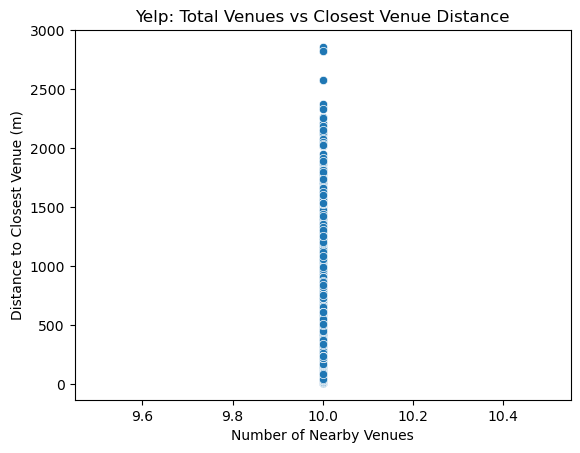

In [12]:
sns.scatterplot(
    data=yelp_summary,
    x="total_yelp_venues",
    y="closest_yelp_distance"
)
plt.title("Yelp: Total Venues vs Closest Venue Distance")
plt.xlabel("Number of Nearby Venues")
plt.ylabel("Distance to Closest Venue (m)")
plt.show()


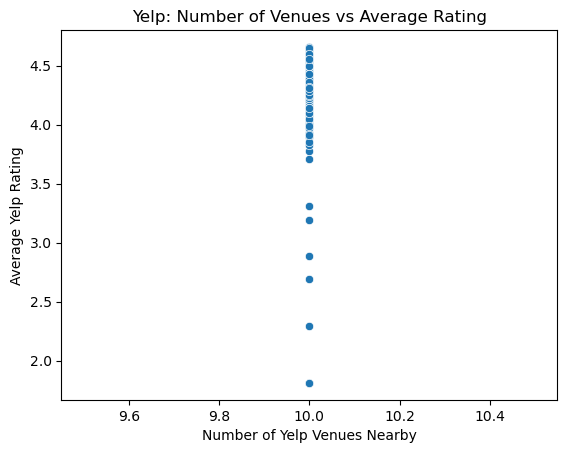

In [13]:
sns.scatterplot(
    data=yelp_summary,
    x="total_yelp_venues",
    y="avg_yelp_rating"
)
plt.title("Yelp: Number of Venues vs Average Rating")
plt.xlabel("Number of Yelp Venues Nearby")
plt.ylabel("Average Yelp Rating")
plt.show()


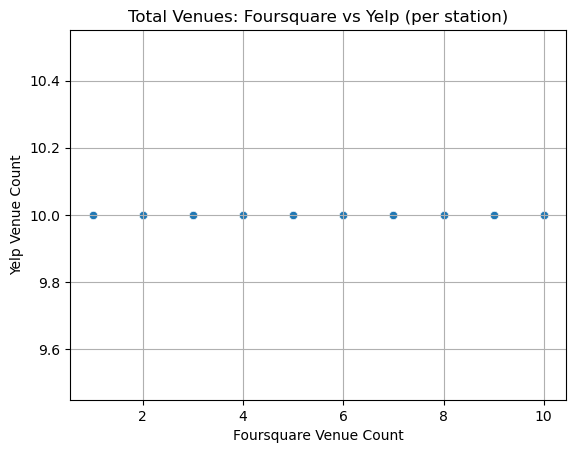

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


venue_comparison = fsq_summary.merge(
    yelp_summary[["station", "total_yelp_venues"]],
    on="station"
)

sns.scatterplot(
    data=venue_comparison,
    x="total_fsq_venues",
    y="total_yelp_venues"
)
plt.title("Total Venues: Foursquare vs Yelp (per station)")
plt.xlabel("Foursquare Venue Count")
plt.ylabel("Yelp Venue Count")
plt.grid(True)
plt.show()


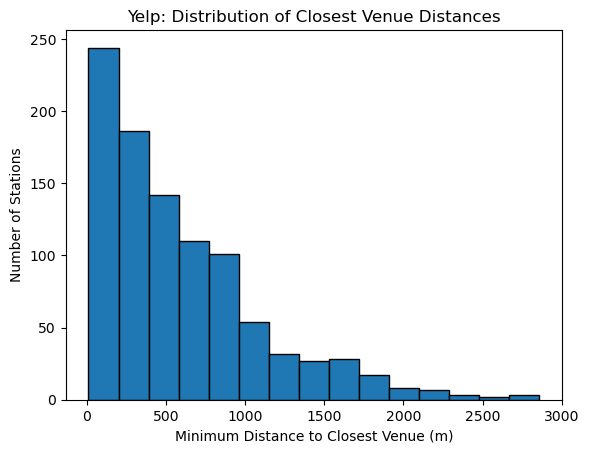

In [16]:
plt.hist(yelp_summary["closest_yelp_distance"], bins=15, edgecolor='black')
plt.title("Yelp: Distribution of Closest Venue Distances")
plt.xlabel("Minimum Distance to Closest Venue (m)")
plt.ylabel("Number of Stations")
plt.show()


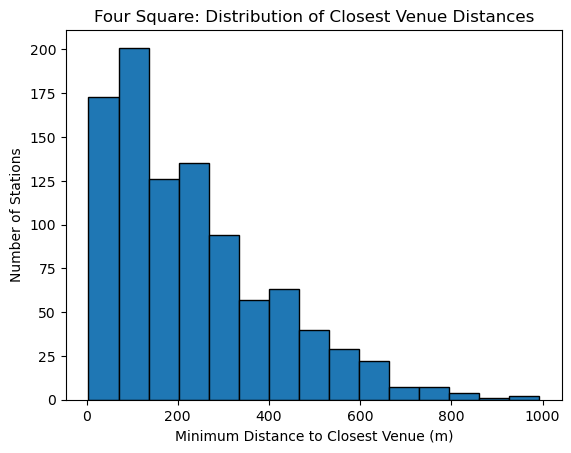

In [17]:
plt.hist(fsq_summary["distance"], bins=15, edgecolor='black')
plt.title("Four Square: Distribution of Closest Venue Distances")
plt.xlabel("Minimum Distance to Closest Venue (m)")
plt.ylabel("Number of Stations")
plt.show()

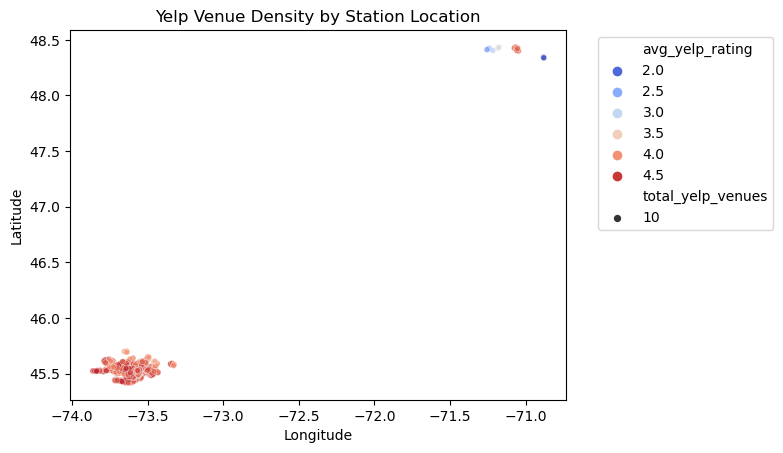

In [18]:
sns.scatterplot(
    data=yelp_summary,
    x="station_lon",
    y="station_lat",
    size="total_yelp_venues",
    hue="avg_yelp_rating",
    palette="coolwarm",
    alpha=0.7
)
plt.title("Yelp Venue Density by Station Location")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2)
plt.show()


A few initial patterns observed are:
For the Four Square data, we can see that there are quite a number of bike stations that do not have alot of eateries close by. BUt with the Yelp data, every bike station has atleast 10 eateries. This suggests that Yelp (atleast in the zones investigated) has more customer (businesses) data when compared to FourSquare.
The scatter plot also generally shows that customers are more likely to give a rating if it is positive. This is supported by the fact that the data set overall has fewer negative ratings compared to positive ratings. For Yelp, the data shows that there are lots of bike stations with restaurants and eateries within 500 meters. Four Square shows similar trend except that most stations are witin 250 metres of a nearest restaurant/eatery. Lastly, for the two cities investigated - Montreal and Acces Velo Saguenay, we can see that Montreal has alot more restaurants.

# Database

Put all your results in an SQLite3 database (remember, SQLite stores its databases as files in your local machine - make sure to create your database in your project's data/ directory!)

Look at the data before and after the join to validate your data.

In [4]:
import os
print(os.path.exists("data"))


True


In [3]:
os.makedirs("data", exist_ok=True)


In [19]:
import sqlite3

conn = sqlite3.connect("data/bike_project.db")

df_stations.to_sql("bike_stations", conn, if_exists="replace", index=False)
yelp_summary.to_sql("yelp_summary", conn, if_exists="replace", index=False)
fsq_summary.to_sql("fsq_summary", conn, if_exists="replace", index=False)

conn.close()


In [20]:
conn = sqlite3.connect("data/bike_project.db")
pd.read_sql("SELECT * FROM yelp_summary LIMIT 5", conn)


,station,station_lat,station_lon,total_yelp_venues,avg_yelp_rating,total_yelp_reviews,closest_yelp_distance
0,12e avenue / St-Zotique,45.556867,-73.589306,10,4.44,4118,398.273015
1,14e avenue / Jean-Talon,45.561324,-73.596294,10,4.46,4129,1374.100685
2,15e Rue / Robin,45.559377,-73.698510,10,4.39,727,1826.814001
3,15e avenue / Dandurand,45.554787,-73.574259,10,4.49,4564,580.325179
4,15e avenue / Laurier,45.553320,-73.569328,10,4.37,4812,1655.352221


Created a normalized database with three key tables: bike_stations, yelp_summary, and fsq_summary. Each table stores summarized data at the station level, using station as a common key for joining. This structure ensures data integrity, supports efficient querying, and avoids redundant storage of venue-level data

In [26]:
import sqlite3
import pandas as pd

conn = sqlite3.connect("data/bike_project.db")


pd.read_sql("SELECT * FROM bike_stations LIMIT 5", conn)
#pd.read_sql("SELECT * FROM yelp_summary LIMIT 5", conn)
#pd.read_sql("SELECT * FROM fsq_summary LIMIT 5", conn)


,network,name,latitude,longitude,free_bikes,empty_slots,slots,calculated_total
0,bixi_montreal,Métro de l'Église (Ross / de l'Église),45.462831,-73.565938,7,12,19,19
1,bixi_montreal,Square-Victoria (Viger / du Square-Victoria),45.502085,-73.562941,14,22,37,36
2,bixi_montreal,Hudson / Goyer,45.507437,-73.632658,11,12,23,23
3,bixi_montreal,Marché Jean-Talon (Casgrain / Shamrock),45.535190,-73.615482,9,17,29,26
4,bixi_montreal,du Fort Saint-Louis / de la Perrière,45.613330,-73.451540,8,7,15,15


In [25]:
query = """
SELECT bs.name, bs.latitude, bs.longitude,
       y.avg_yelp_rating, f.total_fsq_venues
FROM bike_stations bs
 JOIN yelp_summary y ON bs.name = y.station
 JOIN fsq_summary f ON bs.name = f.station
LIMIT 5
"""

pd.read_sql(query, conn)


,name,latitude,longitude,avg_yelp_rating,total_fsq_venues
0,Métro de l'Église (Ross / de l'Église),45.462831,-73.565938,4.36,10
1,Square-Victoria (Viger / du Square-Victoria),45.502085,-73.562941,4.32,10
2,Hudson / Goyer,45.507437,-73.632658,4.43,10
3,Marché Jean-Talon (Casgrain / Shamrock),45.535190,-73.615482,4.39,10
4,du Fort Saint-Louis / de la Perrière,45.613330,-73.451540,3.71,10
